<a href="https://colab.research.google.com/github/CLEONG123/Project/blob/main/ProyectoDSParte1%2BGonzalez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Titulo: Análisis de venta de máquinas expendedoras

Autores:César Gonzalez


Definición del problema

R: Estudio de las preferencias del consumidor sobre compras en máquinas expendedoras

Objetivo

R: Entender la tendencia estacional del consumo de productos según el medio de pago aplicado

Hipótesis:

R:Hipótesis: "Las ventas realizadas en efectivo durante el año son predominantemente para la compra de comida en comparación con otras categorías de productos en la máquina expendedora."

Hipótesis nula (H₀): "No existe diferencia significativa en las ventas en efectivo entre comida y otras categorías de productos."

Hipótesis alternativa (H₁): "Las ventas en efectivo son significativamente mayores para comida en comparación con otras categorías de productos."



In [28]:
! git clone https://github.com/CLEONG123/Project.git

fatal: destination path 'Project' already exists and is not an empty directory.


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("/content/Project/vending_machine_sales.csv")

In [30]:
data.head()



,Status,Device ID,Location,Machine,Product,Category,Transaction,TransDate,Type,RCoil,RPrice,RQty,MCoil,MPrice,MQty,LineTotal,TransTotal,Prcd Date
0,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14515778905,1/1/2022,Credit,148,3.5,1,148,3.5,1,3.5,3.5,1/1/2022
1,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516018629,1/1/2022,Credit,148,3.5,1,148,3.5,1,3.5,5.0,1/1/2022
2,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516018629,1/1/2022,Credit,123,1.5,1,123,1.5,1,1.5,5.0,1/1/2022
3,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516020373,1/1/2022,Credit,123,1.5,1,123,1.5,1,1.5,1.5,1/1/2022
4,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516021756,1/1/2022,Credit,148,3.5,1,148,3.5,1,3.5,3.5,1/1/2022


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9617 entries, 0 to 9616
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Status            9617 non-null   object 
 1   Device ID         9617 non-null   object 
 2   Location          9617 non-null   object 
 3   Machine           9617 non-null   object 
 4   Product           9611 non-null   object 
 5   Category          9350 non-null   object 
 6   Transaction       9617 non-null   int64  
 7   TransDate         9617 non-null   object 
 8   Type              9617 non-null   object 
 9   RCoil             9617 non-null   int64  
 10  RPrice            9617 non-null   float64
 11  RQty              9617 non-null   int64  
 12  MCoil             9617 non-null   int64  
 13  MPrice            9614 non-null   float64
 14  MQty              9617 non-null   int64  
 15  LineTotal         9617 non-null   float64
 16  TransTotal        9617 non-null   float64


In [85]:
data = data.dropna(subset="Product")
data =data.dropna(subset="Category")
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9350 entries, 0 to 9616
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Status            9350 non-null   object 
 1   Device ID         9350 non-null   object 
 2   Location          9350 non-null   object 
 3   Machine           9350 non-null   object 
 4   Product           9350 non-null   object 
 5   Category          9350 non-null   object 
 6   Transaction       9350 non-null   int64  
 7   TransDate         9350 non-null   object 
 8   Type              9350 non-null   object 
 9   RCoil             9350 non-null   int64  
 10  RPrice            9350 non-null   float64
 11  RQty              9350 non-null   int64  
 12  MCoil             9350 non-null   int64  
 13  MPrice            9350 non-null   float64
 14  MQty              9350 non-null   int64  
 15  LineTotal         9350 non-null   float64
 16  TransTotal        9350 non-null   float64
 17  

<function matplotlib.pyplot.show(close=None, block=None)>

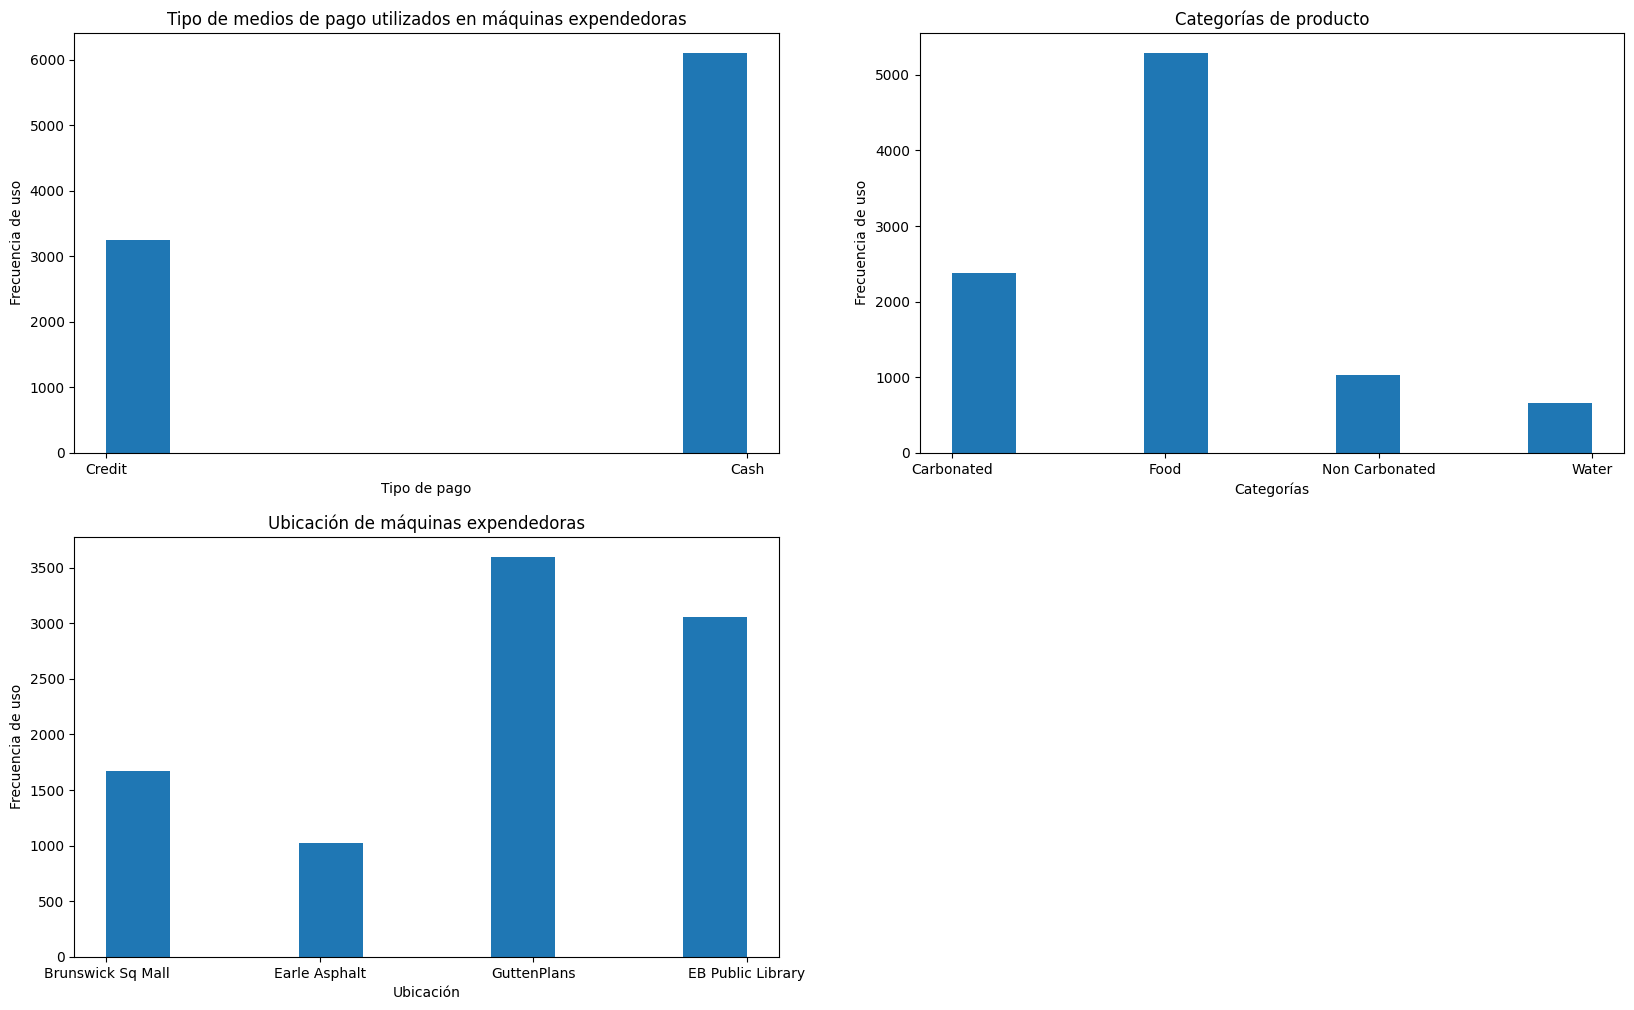

In [86]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
plt.hist(data['Type'])
plt.title("Tipo de medios de pago utilizados en máquinas expendedoras")
plt.xlabel("Tipo de pago")
plt.ylabel("Frecuencia de uso")


plt.subplot(2,2,2)
plt.hist(data['Category'])
plt.title("Categorías de producto")
plt.xlabel("Categorías")
plt.ylabel("Frecuencia de uso")

plt.subplot(2,2,3)
plt.hist(data['Location'])
plt.title("Ubicación de máquinas expendedoras")
plt.xlabel("Ubicación")
plt.ylabel("Frecuencia de uso")

plt.show

In [87]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()


data['Type_encoded'] = encoder.fit_transform(data["Type"])
data['Category_encoded'] = encoder.fit_transform(data["Category"])
data.head()

,Status,Device ID,Location,Machine,Product,Category,Transaction,TransDate,Type,RCoil,RPrice,RQty,MCoil,MPrice,MQty,LineTotal,TransTotal,Prcd Date,Type_encoded,Category_encoded
0,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14515778905,1/1/2022,Credit,148,3.5,1,148,3.5,1,3.5,3.5,1/1/2022,1,0
1,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516018629,1/1/2022,Credit,148,3.5,1,148,3.5,1,3.5,5.0,1/1/2022,1,0
2,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516018629,1/1/2022,Credit,123,1.5,1,123,1.5,1,1.5,5.0,1/1/2022,1,1
3,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516020373,1/1/2022,Credit,123,1.5,1,123,1.5,1,1.5,1.5,1/1/2022,1,1
4,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516021756,1/1/2022,Credit,148,3.5,1,148,3.5,1,3.5,3.5,1/1/2022,1,0


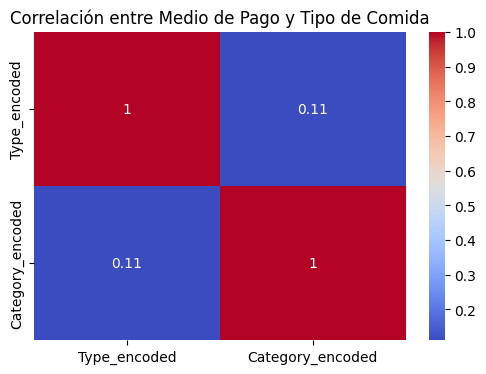

In [88]:
from scipy.stats import chi2_contingency
correlation_matrix = data[['Type_encoded', 'Category_encoded']].corr()


plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True)


plt.title('Correlación entre Medio de Pago y Tipo de Comida')
plt.show()

In [89]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(data['Type_encoded'], data['Category_encoded'])


chi2, p, dof, expected = chi2_contingency(contingency_table)


print("Tabla de contingencia:")
print(contingency_table)
print("\nResultado del test de Chi-cuadrado:")
print(f"Chi-cuadrado: {chi2}")
print(f"P-value: {p}")


if p < 0.05:
    print("\nRechazamos la hipótesis nula: Hay una relación significativa entre el medio de pago y la categoría de producto.")
else:
    print("\nNo podemos rechazar la hipótesis nula: No hay suficiente evidencia para afirmar que las ventas en efectivo están predominantemente asociadas con snacks.")

Tabla de contingencia:
Category_encoded     0     1    2    3
Type_encoded                          
0                 1728  3448  559  373
1                  649  1845  464  284

Resultado del test de Chi-cuadrado:
Chi-cuadrado: 129.8479177738352
P-value: 5.832400004959029e-28

Rechazamos la hipótesis nula: Hay una relación significativa entre el medio de pago y la categoría de producto.


In [97]:
print("\nMapeo de categorías originales a valores codificados:")
for Category, code in zip(encoder.classes_, encoder.transform(encoder.classes_)):
    print(f"{Category} -> {code}")







Mapeo de categorías originales a valores codificados:
Carbonated -> 0
Food -> 1
Non Carbonated -> 2
Water -> 3


En base a los resultados, podemos decir que rechazamos la hipótesis nula y aceptamos que existe una relevancia significativa entre los medios de pago en efectivo y venta de comida en las máquinas expendedoras